### Step 1. Import the necessary libraries

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Step 2. Import the dataset and print the first five records. 

In [13]:
#index_col=0
crime = pd.read_csv('./crime.csv', index_col=0)
crime.head()

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961,182992000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962,185771000,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963,188483000,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964,191141000,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


### Step 3. What is the type of the columns?

In [14]:
crime.dtypes

Population            int64
Violent               int64
Property              int64
Murder                int64
Forcible_Rape         int64
Robbery               int64
Aggravated_assault    int64
Burglary              int64
Larceny_Theft         int64
Vehicle_Theft         int64
dtype: object

### Step 4. Generate descriptive statistics

In [15]:
crime.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,55.0,2.461556e+08,4.166216e+07,179323175.0,210621500.0,242282918.0,283369732.5,318857056.0
Violent,55.0,1.188806e+06,4.597107e+05,288460.0,925315.0,1322390.0,1432762.0,1932270.0
Property,55.0,9.412499e+06,2.738512e+06,3095700.0,8060014.5,10182586.0,11605087.5,12961100.0
Murder,55.0,1.731724e+04,4.267443e+03,8530.0,14819.0,17030.0,20561.5,24700.0
Forcible_Rape,55.0,7.271480e+04,2.827801e+04,17190.0,53400.0,84230.0,92930.0,109060.0
Robbery,55.0,4.164499e+05,1.505064e+05,106670.0,354911.5,423557.0,512137.0,687730.0
Aggravated_assault,55.0,6.811818e+05,2.960255e+05,154320.0,438430.0,741291.0,900215.0,1135610.0
Burglary,55.0,2.424017e+06,7.259004e+05,912100.0,2105335.5,2329950.0,3073600.0,3795200.0
Larceny_Theft,55.0,5.959947e+06,1.846401e+06,1855400.0,4843350.0,6591900.0,7168450.0,8142200.0
Vehicle_Theft,55.0,1.028614e+06,3.455693e+05,328200.0,789626.0,1032200.0,1239302.5,1661700.0


### Step 5. Add a new column "Total". 

**This column contains the total crime happened each year**

In [16]:
#To exclude the column "Population" by creating a list of columns and then excluding the "Population" list item 
crime_category = list(crime)
crime_category.remove("Population")

#To Sum only the Crime Category columns across each row/Year
crime["Total"]=crime[crime_category].sum(axis=1)
crime.head()

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft,Total
Year,,,,,,,,,,,
1960,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200,6768320
1961,182992000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000,6975980
1962,185771000,301510,3450700,8530,17550,110860,164570,994300,2089600,366800,7504420
1963,188483000,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300,8218940
1964,191141000,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800,9129240


### Step 6. Which are those years when the total crime exceeded 25000000?

In [17]:
df = crime[crime['Total']>25000000]

high_crime = crime[crime['Total']>25000000]
print("The years when when the total crime exceeded 25000000 were: \n"+ str(high_crime[['Total']]))

The years when when the total crime exceeded 25000000 were: 
         Total
Year          
1980  26816540
1981  26847450
1982  25948780
1986  26423738
1987  27017455
1988  27846250
1989  28502880
1990  28951260
1991  29745730
1992  28876340
1993  28289640
1994  27979150
1995  27725390
1996  26987680
1997  26387516


### Step 7. Find the year when crime was at its minimum.

In [18]:
yearly_crime = crime[['Total']].index
min_crime = yearly_crime.min()
print("The year when crime was at its minimum was: "+str(min_crime))

The year when crime was at its minimum was: 1960


### Step 8. When was the most dangerous and the safest decade to live in this country?

**Hint:** https://www.thetopsites.net/article/54003707.shtml

In [19]:
#Set up of decades
decade_total = crime.groupby((crime[['Total']].index//10)*10).sum()

#Most dandergous decade
dangerous_decade = decade_total['Total'].index.max()
print("The most dangerous decade was: "+str(dangerous_decade))

#Safest decade
safest_decade = decade_total['Total'].index.min()
print("The safest decade was: "+str(safest_decade))

AttributeError: 'int' object has no attribute 'index'

### Step 9. Visualize the Crime Rate

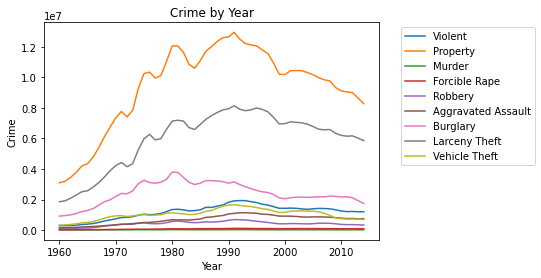

In [692]:
#Plot Lines
plt.plot(crime.index, crime[['Violent']],label='Violent')
plt.plot(crime.index, crime[['Property']],label='Property')
plt.plot(crime.index, crime[['Murder']],label='Murder')
plt.plot(crime.index, crime[['Forcible_Rape']],label='Forcible Rape')
plt.plot(crime.index, crime[['Robbery']],label='Robbery')
plt.plot(crime.index, crime[['Aggravated_assault']],label='Aggravated Assault')
plt.plot(crime.index, crime[['Burglary']],label='Burglary')
plt.plot(crime.index, crime[['Larceny_Theft']],label='Larceny Theft')
plt.plot(crime.index, crime[['Vehicle_Theft']],label='Vehicle Theft')

#Titles
plt.title('Crime by Year')
plt.xlabel('Year')
plt.ylabel('Crime')

#Legend 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

**Based on the visualization identify which crime is the most frequent and less frequent.** 

Based on the visualization Property Crime is the most frequent and Murder is less frequent.

### Step 10. Find two other compelling findings from the gven dataset. 

10 (a). For the first insight, the analysis would identify the proportion, on average, the top 3 categories account for as a percentage of total crime. The top 3 categories are picked from the visualization.

In [723]:
top3 = ((crime["Property"]+crime["Larceny_Theft"]+crime["Burglary"])/crime["Total"])*100
top3.mean()

84.3030182486237

Findings: The top 3 crime categories account for nearly 85% of all crime on average.

10 (b). For the second insight, the analysis would identify which years had the lowest and the highest amount of crime per population.

In [724]:
high_crime_population = (crime["Total"]/crime["Population"]).index.max()
low_crime_population = (crime["Total"]/crime["Population"]).index.min()

print("Findings:")
print("The year with the highest crime per population rate was: "+ str(high_crime_population))
print("The year with the lowest crime per population rate was: "+ str(low_crime_population))

Findings:
The year with the highest crime per population rate was: 2014
The year with the lowest crime per population rate was: 1960
